In [1]:
# import some libraries
from scipy.stats import hmean
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('ticks')
sns.set_context('talk')

## Extract temperature data for MC-rejection
For this, we use the `borehole logs`function in shemat. Borehole logs are defined for `i` and `j` values:  
* 32, 15
* 79, 23
* 53, 34

In [18]:
def load_borehole_log(datafile: str=None, z_asl: int=0):
    
    if z_asl > 0:
        z_asl = -z_asl
        
    header = ['temperature', 'hydraulic head', 'pressure', 'delz', 'uindex']
    
    data = np.loadtxt(datafile)
    log_file = pd.DataFrame(data=data, columns=header)
    log_file['z_asl'] = log_file['delz'].cumsum() + z_asl
    
    return log_file

def extractLogHDF(hdf_file: str=None, borehole_coordinate: list=[0,0], z_asl: int=0):
    
    if z_asl > 0:
        z_asl = -z_asl
        
    h5_file = h5py.File(hdf_file)
    log_data = {}
    log_data['temperature'] = h5_file['temp'][:, borehole_coordinate[1], borehole_coordinate[0]]
    log_data['hydraulic head'] = h5_file['head'][:, borehole_coordinate[1], borehole_coordinate[0]]
    log_data['pressure'] = h5_file['pres'][:, borehole_coordinate[1], borehole_coordinate[0]]
    log_data['uindex'] = h5_file['uindex'][:, borehole_coordinate[1], borehole_coordinate[0]]
    log_data['z_asl'] = h5_file['z'][:,0,0] + z_asl
    
    borehole_dataframe = pd.DataFrame.from_dict(log_data)
    
    return borehole_dataframe
    

In [19]:
h5_file = extractLogHDF('../models/20210219_MC_ensemble/PCT_base_model_final.h5',
                       borehole_coordinate=bhole[0,:], z_asl=-6500)

In [20]:
h5_file

,temperature,hydraulic head,pressure,uindex,z_asl
0,266.689599,7088.814391,68.890288,13,-6437.5
1,261.877472,7108.591006,67.860111,13,-6312.5
2,257.086056,7127.782836,66.824209,13,-6187.5
3,252.315251,7146.398857,65.782669,13,-6062.5
4,247.564757,7164.448088,64.735581,13,-5937.5
5,242.834117,7181.939538,63.683031,13,-5812.5
6,238.122767,7198.882136,62.625108,13,-5687.5
7,233.430039,7215.284662,61.561897,13,-5562.5
8,228.755173,7231.155686,60.493483,13,-5437.5
9,224.097336,7246.503506,59.419947,13,-5312.5


In [5]:
# i and j values need to be substracted by 1, as fortran starts to count at 1, and python at 0
bhole = np.array([[31, 14],
                 [78, 22],
                 [52, 33]])

In [6]:
temps = h5_file['temp'][:,bhole[0,1], bhole[0,0]]

In [7]:
temp = h5_file['temp'][:,:,:]
head = h5_file['head'][:,:,:]
pres = h5_file['pres'][:,:,:]
uindex = h5_file['uindex'][:,:,:]



In [14]:
h5_file['z'][:,0,0]

array([  62.5,  187.5,  312.5,  437.5,  562.5,  687.5,  812.5,  937.5,
       1062.5, 1187.5, 1312.5, 1437.5, 1562.5, 1687.5, 1812.5, 1937.5,
       2062.5, 2187.5, 2312.5, 2437.5, 2562.5, 2687.5, 2812.5, 2937.5,
       3062.5, 3187.5, 3312.5, 3437.5, 3562.5, 3687.5, 3812.5, 3937.5,
       4062.5, 4187.5, 4312.5, 4437.5, 4562.5, 4687.5, 4812.5, 4937.5,
       5062.5, 5187.5, 5312.5, 5437.5, 5562.5, 5687.5, 5812.5, 5937.5,
       6062.5, 6187.5, 6312.5, 6437.5, 6562.5, 6687.5, 6812.5, 6937.5,
       7062.5, 7187.5, 7312.5, 7437.5])

In [44]:
log1 = load_borehole_log('../models/20210219_MC_ensemble/PCT_base_model_final_borehole3.dat', z_asl=-6500)

<AxesSubplot:xlabel='temperature', ylabel='z_asl'>

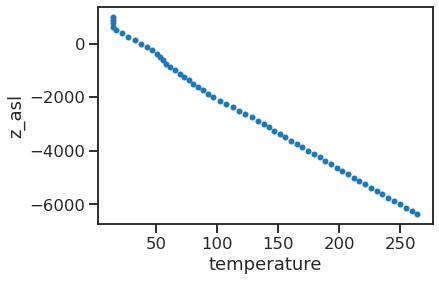

In [45]:
log1.plot.scatter('temperature', 'z_asl')

In [46]:
log1

,temperature,hydraulic head,pressure,delz,uindex,z_asl
0,263.835994,7098.739569,6.898746e+07,125.0,13.0,-6375.0
1,259.031686,7118.111336,6.795332e+07,125.0,13.0,-6250.0
2,254.239864,7136.922180,6.691369e+07,125.0,13.0,-6125.0
3,249.460874,7155.178945,6.586863e+07,125.0,13.0,-6000.0
4,244.694821,7172.888698,6.481822e+07,125.0,13.0,-5875.0
5,239.941686,7190.058724,6.376252e+07,125.0,13.0,-5750.0
6,235.201381,7206.696508,6.270161e+07,125.0,13.0,-5625.0
7,230.473742,7222.809730,6.163557e+07,125.0,13.0,-5500.0
8,225.758530,7238.406274,6.056447e+07,125.0,13.0,-5375.0
9,221.055429,7253.494234,5.948839e+07,125.0,13.0,-5250.0


In [47]:
data = pd.DataFrame(log1['temperature'][21:56])

In [48]:
data['i'] = 53
data['j'] = 34
data['k'] = data.index
data['error'] = 0.5
data['var_flag'] = 2
data['flag'] = 1
data['Name'] = "!borehole3"

In [49]:
data = data.reindex(columns= ['temperature', 'error', 'i', 'j', 'k', 'var_flag', 'flag', 'Name'])

In [50]:
data

,temperature,error,i,j,k,var_flag,flag,Name
21,165.168817,0.5,53,34,21,2,1,!borehole3
22,160.532261,0.5,53,34,22,2,1,!borehole3
23,155.951397,0.5,53,34,23,2,1,!borehole3
24,151.411795,0.5,53,34,24,2,1,!borehole3
25,146.878488,0.5,53,34,25,2,1,!borehole3
26,142.417330,0.5,53,34,26,2,1,!borehole3
27,138.149406,0.5,53,34,27,2,1,!borehole3
28,133.398373,0.5,53,34,28,2,1,!borehole3
29,128.185570,0.5,53,34,29,2,1,!borehole3
30,123.072557,0.5,53,34,30,2,1,!borehole3


In [51]:
data.to_csv('../models/20210219_MC_ensemble/data_SHEMAT_bhole3.csv', index=False)

## Concatenate the borehole data

In [52]:
b1 = pd.read_csv('../models/20210219_MC_ensemble/data_SHEMAT_bhole1.csv')
b2 = pd.read_csv('../models/20210219_MC_ensemble/data_SHEMAT_bhole2.csv')
b3 = pd.read_csv('../models/20210219_MC_ensemble/data_SHEMAT_bhole3.csv')

In [53]:
frames = [b1, b2, b3]
allb = pd.concat(frames, ignore_index=True)

In [55]:
allb.to_csv('../models/20210219_MC_ensemble/data_SHEMAT_all_bholes.csv', index=False)

## add data to input files

In [65]:
def read_file(filename):
    """
    Open and read a SHEMAT-Suite input file
    **Arguments**:
        -*filename* = string: filename
    
    **Returns**:
        -List of lines in the file #better Dict??
    """
    try:
        file = open(filename, 'r')
    except IOError (nr, string_err):
        print("Cannot open file {} : {} Err# {}.".format(filename, string_err, nr))
        print("Please check if the file name and directory are correct.")
        raise IOError
    # check if number of entries is correct
    filelines = file.readlines()
    file.close()
    # set local vairables
    return filelines

def get(self, var_name, line=1):
    """
    Get the value of a scalar variable.
    Determines the value of a variable or parameter in the SHEMAT-Suite Input
    file.
    **Arguments**:
        - *var_name* = string: Name of the scalar variable
    **Optional keywords**:
        - *line* = Number of lines for multiline variables
    **Returns**
        String with variable
    """
    for (i,j) in enumerate(self.filelines):
        if var_name in j:
            if line == 1:
                return self.filelines[i+1]
                break
            else:
                lines = []
                for k in range(line):
                    lines.append(self.filelines[i+1])
                return lines
                break

In [69]:
sh_file

['!==========>>>>> INFO\n',
 '# Title\n',
 'PCT_MC_59\n',
 '\n',
 '# linfo\n',
 '1 2 1 1\n',
 '\n',
 '# runmode\n',
 '1\n',
 '\n',
 '# timestep control\n',
 '0\n',
 '1           1           0           0\n',
 '\n',
 '# tunit\n',
 '1\n',
 ' \n',
 '# time periods, records=1\n',
 '0      60000000    200      lin\n',
 '           \n',
 '# output times, records=10\n',
 '1\n',
 '6000000\n',
 '12000000\n',
 '18000000\n',
 '24000000\n',
 '30000000\n',
 '36000000\n',
 '42000000\n',
 '48000000\n',
 '54000000\n',
 '    \n',
 '# file output: hdf vtk\n',
 '\n',
 '# active temp\n',
 '\n',
 '# PROPS=bas\n',
 '\n',
 '# USER=none\n',
 '\n',
 '\n',
 '# grid\n',
 '100 50 60\n',
 '\n',
 '# delx\n',
 '100*280.0\n',
 '\n',
 '# dely\n',
 '50*280.0\n',
 '\n',
 '# delz\n',
 '60*125.0\n',
 '\n',
 '!==========>>>>> NONLINEAR SOLVER\n',
 '# nlsolve\n',
 '50 0\n',
 '\n',
 '!==========>>>>> FLOW\n',
 '# lsolvef (linear solver control)\n',
 '1.d-12 64 500\n',
 '# nliterf (nonlinear iteration control)\n',
 '1.0d-10 1

In [68]:
with open(files[0], 'r') as f:
    lines = f.readlines()

with open(files[0], 'w') as f:
    for line in lines:
        line = line.replace('# runmode\n1\n', '# runmode\n2\n')
        f.write(line)

AttributeError: 'list' object has no attribute 'filelines'

In [56]:
import glob

In [57]:
files = glob.glob('../models/20210219_MC_ensemble/*_MC*')

In [71]:
datafile = '../models/20210219_MC_ensemble/data_SHEMAT_all_bholes.csv'
with open(datafile, 'r') as file:
    data_vals = file.read()
data_string = f"\n# data, records={len(allb)}\n!"
data_string += data_vals

In [72]:
data_string

'# data, records=96\n!temperature,error,i,j,k,var_flag,flag,Name\n178.28938547402802,0.5,32,15,19,2,1,!borehole1\n173.777188401397,0.5,32,15,20,2,1,!borehole1\n169.277829013701,0.5,32,15,21,2,1,!borehole1\n164.79183898481,0.5,32,15,22,2,1,!borehole1\n160.319868935255,0.5,32,15,23,2,1,!borehole1\n155.86249033166402,0.5,32,15,24,2,1,!borehole1\n151.420003812109,0.5,32,15,25,2,1,!borehole1\n146.992535045352,0.5,32,15,26,2,1,!borehole1\n142.580620396946,0.5,32,15,27,2,1,!borehole1\n138.186137836017,0.5,32,15,28,2,1,!borehole1\n133.811878118642,0.5,32,15,29,2,1,!borehole1\n129.46016204679,0.5,32,15,30,2,1,!borehole1\n125.13144987104799,0.5,32,15,31,2,1,!borehole1\n120.823296348444,0.5,32,15,32,2,1,!borehole1\n116.53018981391199,0.5,32,15,33,2,1,!borehole1\n112.246203645012,0.5,32,15,34,2,1,!borehole1\n107.97624475428101,0.5,32,15,35,2,1,!borehole1\n103.73225238914499,0.5,32,15,36,2,1,!borehole1\n99.5253808920435,0.5,32,15,37,2,1,!borehole1\n95.3643790641434,0.5,32,15,38,2,1,!borehole1\n91.2

In [61]:
for f in files:
    with open(f, "a") as myfile:
        myfile.write(data_string)